In [6]:
# Resampling using SMOTE
from imblearn.over_sampling import SMOTE
import pandas as pd

# Load the dataset
data = pd.read_csv('Processed_random.csv')

# Separate features and target
X = data.drop(columns=['app'])
y = data['app']

# Print the initial class distribution
print("Original class distribution:")
print(y.value_counts())

# Step 1: Resampling - Use SMOTE for oversampling the minority class
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

# Combine the resampled features and target into a new DataFrame
resampled_data = pd.DataFrame(X_resampled, columns=X.columns)
resampled_data['app'] = y_resampled

print("Resampled class distribution:")
print(y_resampled.value_counts())

# Save the resampled data to 'balanced_smote.csv'
resampled_data.to_csv('balanced_random_smote.csv', index=False)

print("Resampled dataset saved to 'balanced_random_smote.csv'")


Original class distribution:
app
8     2029
12    1353
4     1068
10    1068
11     827
9      557
13     548
2      459
0      437
1      415
7      389
5      380
6      315
3      201
Name: count, dtype: int64
Resampled class distribution:
app
0     2029
1     2029
2     2029
3     2029
4     2029
5     2029
6     2029
7     2029
8     2029
9     2029
10    2029
11    2029
12    2029
13    2029
Name: count, dtype: int64
Resampled dataset saved to 'balanced_random_smote.csv'


In [7]:
#Resampling using enn
from imblearn.under_sampling import EditedNearestNeighbours
import pandas as pd

# Load the dataset
data = pd.read_csv('Processed_random.csv')

# Separate features and target
X = data.drop(columns=['app'])
y = data['app']

# Print the initial class distribution
print("Original class distribution:")
print(y.value_counts())

# Step 1: Resampling - Use ENN for undersampling
enn = EditedNearestNeighbours(n_neighbors=3)  # You can adjust the number of neighbors
X_resampled, y_resampled = enn.fit_resample(X, y)

# Combine the resampled features and target into a new DataFrame
resampled_data = pd.DataFrame(X_resampled, columns=X.columns)
resampled_data['app'] = y_resampled

# Save the resampled data to 'balanced_enn.csv'
resampled_data.to_csv('balanced_random_enn.csv', index=False)

print("Resampled class distribution:")
print(y_resampled.value_counts())


print("Resampled dataset saved to 'balanced_random_smote.csv'")


Original class distribution:
app
8     2029
12    1353
4     1068
10    1068
11     827
9      557
13     548
2      459
0      437
1      415
7      389
5      380
6      315
3      201
Name: count, dtype: int64
Resampled class distribution:
app
8     1548
12     977
4      668
10     583
11     444
13     281
0      270
9      210
3      201
7      129
2      128
1       67
6       67
5       65
Name: count, dtype: int64
Resampled dataset saved to 'balanced_random_smote.csv'


In [1]:
# Resampling using smote-enn
from imblearn.combine import SMOTEENN
import pandas as pd

# Load the dataset
data = pd.read_csv('Processed_random.csv')

# Separate features and target
X = data.drop(columns=['app'])
y = data['app']

# Print the initial class distribution
print("Original class distribution:")
print(y.value_counts())

# Step 1: Resampling - Use SMOTEENN for oversampling and noise removal
smote_enn = SMOTEENN(random_state=42)
X_resampled, y_resampled = smote_enn.fit_resample(X, y)

# Combine the resampled features and target into a new DataFrame
resampled_data = pd.DataFrame(X_resampled, columns=X.columns)
resampled_data['app'] = y_resampled

# Save the resampled data to 'balanced_smoteenn.csv'
resampled_data.to_csv('balanced_random_smoteenn.csv', index=False)

print("Resampled class distribution:")
print(y_resampled.value_counts())


print("Resampled dataset saved to 'balanced_random_smote.csv'")



Original class distribution:
app
8     2029
12    1353
4     1068
10    1068
11     827
9      557
13     548
2      459
0      437
1      415
7      389
5      380
6      315
3      201
Name: count, dtype: int64
Resampled class distribution:
app
13    1818
0     1731
11    1719
9     1702
12    1654
3     1625
7     1624
6     1584
4     1551
2     1550
10    1547
5     1534
8     1479
1     1443
Name: count, dtype: int64
Resampled dataset saved to 'balanced_random_smote.csv'


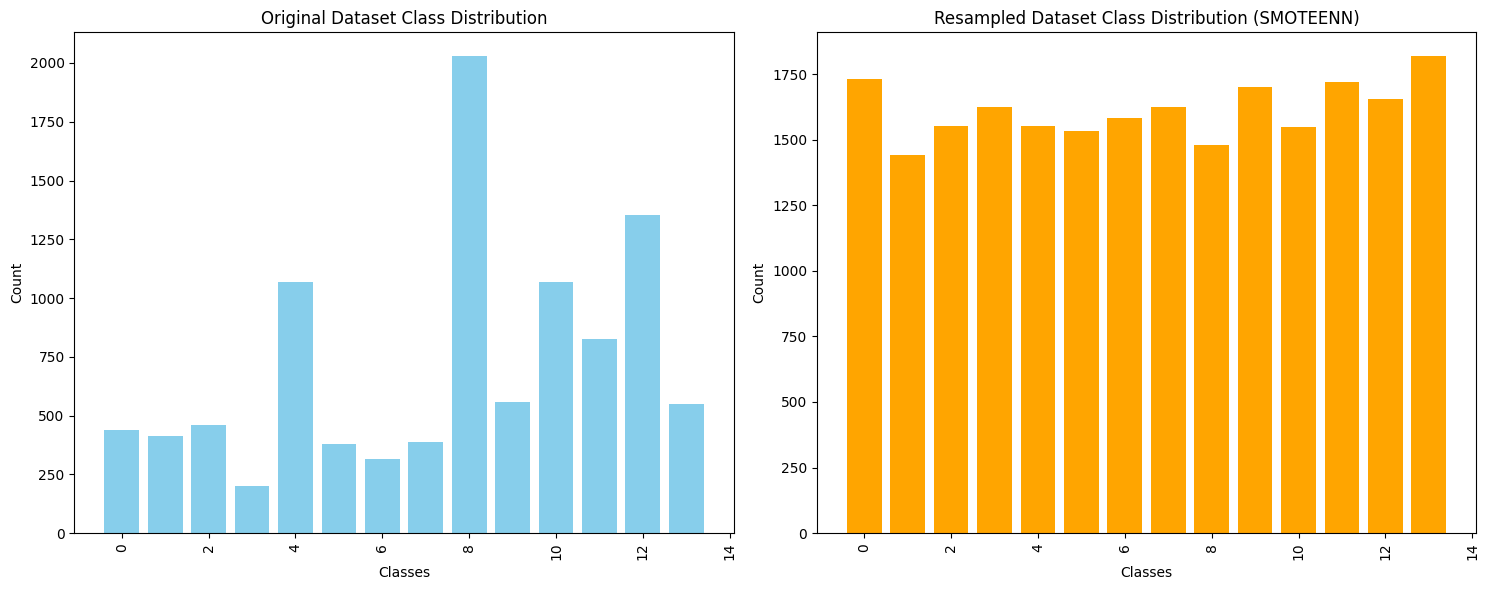

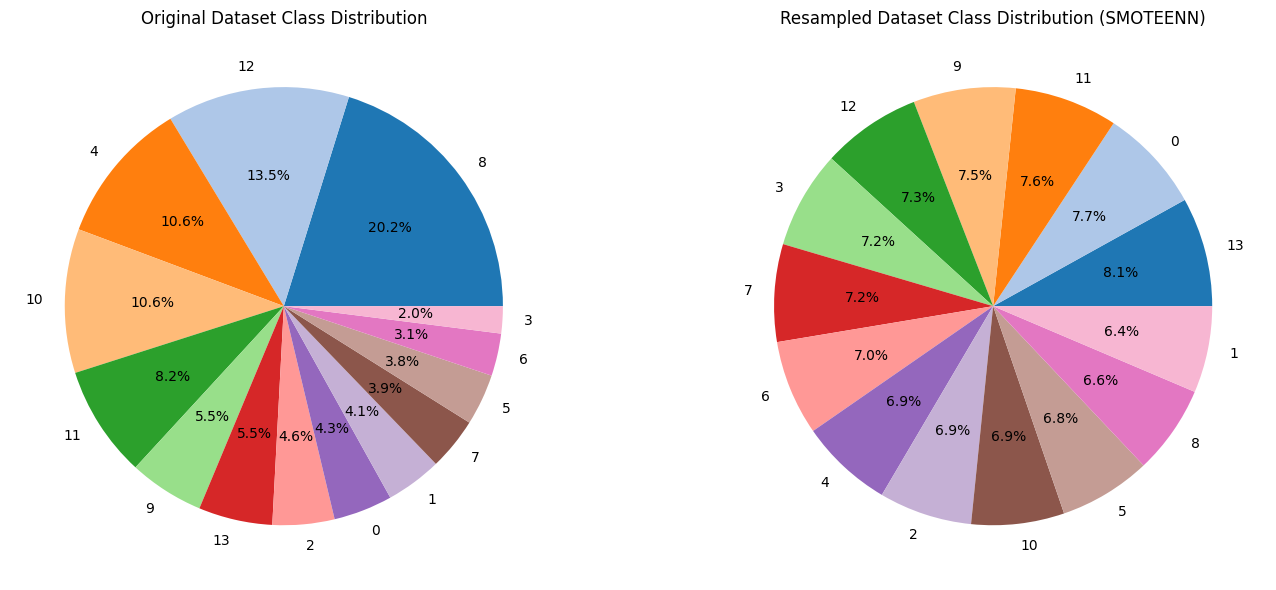

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the original and resampled datasets
original_data = pd.read_csv('Processed_random.csv')
resampled_data = pd.read_csv('balanced_random_smoteenn.csv')

# Get class distributions
original_class_distribution = original_data['app'].value_counts()
resampled_class_distribution = resampled_data['app'].value_counts()

# Visualization: Bar plots for class distributions
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

# Original dataset
axes[0].bar(original_class_distribution.index, original_class_distribution.values, color='skyblue')
axes[0].set_title("Original Dataset Class Distribution")
axes[0].set_xlabel("Classes")
axes[0].set_ylabel("Count")
axes[0].tick_params(axis='x', rotation=90)

# Resampled dataset
axes[1].bar(resampled_class_distribution.index, resampled_class_distribution.values, color='orange')
axes[1].set_title("Resampled Dataset Class Distribution (SMOTEENN)")
axes[1].set_xlabel("Classes")
axes[1].set_ylabel("Count")
axes[1].tick_params(axis='x', rotation=90)

plt.tight_layout()
plt.show()

# Visualization: Pie charts for class distributions
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

# Original dataset
axes[0].pie(original_class_distribution, labels=original_class_distribution.index, autopct='%1.1f%%', colors=plt.cm.tab20.colors)
axes[0].set_title("Original Dataset Class Distribution")

# Resampled dataset
axes[1].pie(resampled_class_distribution, labels=resampled_class_distribution.index, autopct='%1.1f%%', colors=plt.cm.tab20.colors)
axes[1].set_title("Resampled Dataset Class Distribution (SMOTEENN)")

plt.tight_layout()
plt.show()
